# Learn More About How to Build & Train Neural Networks

 - Learning from Karpathy's Micrograd, try to code it myself.
 - We use scalars instead of tensors to keep things simple. However, tensor operations are just convenient ways to perform batches of scalar operations.

In [1]:
from tinyflow import Scalar

a = Scalar(1)
b = Scalar(2)
c = a + b
print(c)

c = c * b
print(c)

Scalar(val=3, grad=0)
Scalar(val=6, grad=0)


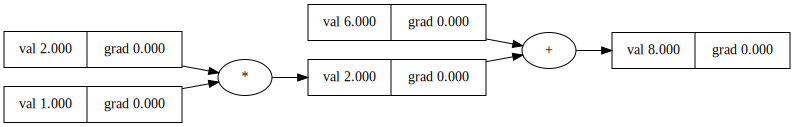

In [2]:
# draw the flow, copy from Karpathy's Micrograd
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})
    
    for n in nodes:
        dot.node(name=str(id(n)), label = "{ val %.3f | grad %.3f }" % (n.val, n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

c = Scalar(6)

d = a * b + c
draw_dot(d)


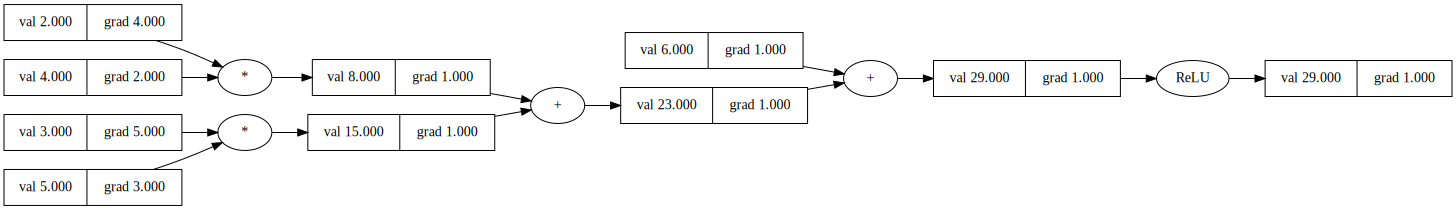

In [3]:
# neural network expression & backpropagation
from tinyflow import Scalar

x1 = Scalar(2.0)
x2 = Scalar(3.0)
w1 = Scalar(4.0)
w2 = Scalar(5.0)
b = Scalar(6.0)

h = x1 * w1 + x2 * w2 + b
y = h.relu()

y.backward()
draw_dot(y)